In [3]:
using Plots
using Clustering
using TimeIt
include("logistic_functions.jl")
include("NRG.jl") 

NRG_ss_fixed_attempts (generic function with 5 methods)

In [15]:
d, Nobs = 20, 100

(20, 100)

In [16]:
X = rand(Normal(), d, Nobs) 
y = zeros(Nobs)
y[1] = 1;

In [17]:
β_0 = ones(d)
max_attempts = 10^6
replace, Print = false, true
σ_β = 10
mb_size = 1;

#### Zig-zag sampler:

6.0 % of switches accepted 
0.14 minutes to run 


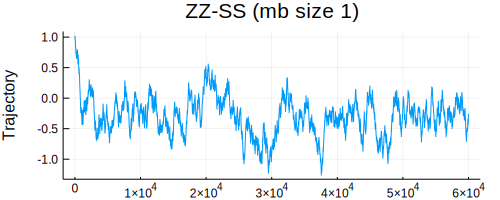

In [18]:
start = time()
s_mb, b_mb = ZZ_log_mb(X, y, max_attempts, β_0, mb_size, σ_β, replace, Print)
print( round((time()-start)/60, 2), " minutes to run \n")

plot(size=(500,200))
plot!(s_mb[1,:], label="", title="ZZ-SS (mb size 1)", ylabel="Trajectory")

#### Our:

In [19]:
α_0 = zeros(Nobs)
mb_size = 1
modprint = d
include_α, replace, Print = false, false, true
c, σ_α = 0.5, 2;

In [ ]:
max_times = [zeros(Nobs); ones(d)/1500]
start = time()
NRG_output = NRG_ss_fixed_attempts(X, y, max_times, max_attempts, α_0, β_0, mb_size, 
                                   c, σ_α, σ_β, modprint, include_α, replace)
ξ_traj, abounce_counter, bounce_counter = NRG_output[1], NRG_output[2], NRG_output[3]
bounces_per_iteration, abounces_per_iteration = NRG_output[4], NRG_output[5] 
print( round((time()-start)/60, 2), " minutes to run \n")

plot(size=(500,200))
plot!(ξ_traj[Nobs+1,1:end-1], label="", title="NRG-SS (mb size 1)", ylabel="Trajectory")

In [11]:
100*mean(bounce_counter[1+Nobs:end]./abounce_counter[1+Nobs:end])

6.182807474403948

In [51]:
mean(abounces_per_iteration)

1.0709267707597079